   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 kB 6.4 MB/s eta 0:00:00


/tmp/ipython-input-2296127601.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Figure 1B rows: 1249
     s_prime
0   6.511618
1   6.525938
2  -5.624607
3 -11.366549
4   5.737155


/tmp/ipython-input-2296127601.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Figure 1A rows: 1249


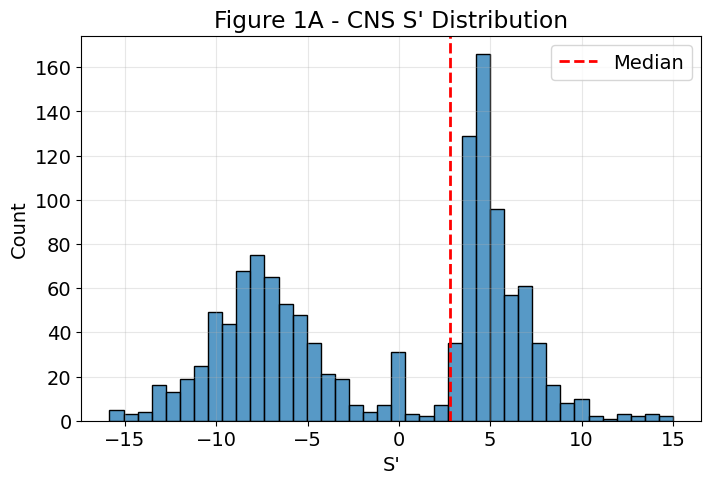

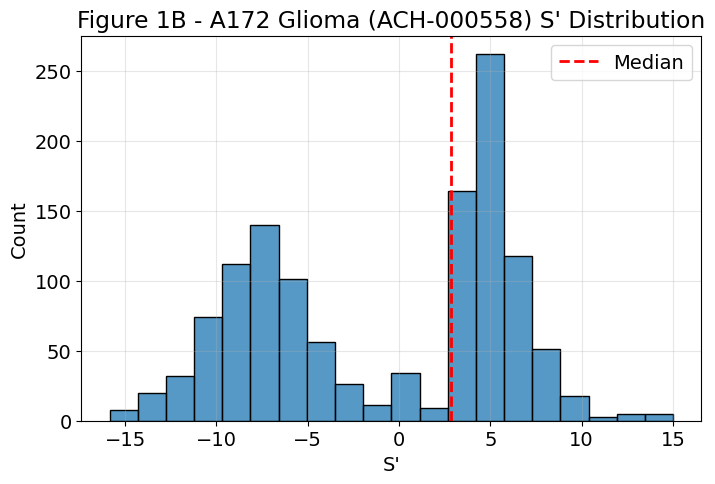

In [1]:
!pip install psycopg[binary]

import pandas as pd
import psycopg
import matplotlib.pyplot as plt
import seaborn as sns


DB_PARAMS = {
    "dbname": "
    "user": "
    "password":
    "host": "
    "port": "
}

def run_query(query: str) -> pd.DataFrame:
    with psycopg.connect(**DB_PARAMS) as conn:
        df = pd.read_sql(query, conn)
    return df

#  Fetching CNS S' for Figure 1A
q_1a = """
WITH parsed AS (
  SELECT
    LEFT(ccle_name, POSITION('_' IN ccle_name) - 1)        AS cell_line,
    SUBSTRING(ccle_name FROM POSITION('_' IN ccle_name)+1) AS tissue,
    s_prime
  FROM public.im_sprime_solved_s_prime
)
SELECT s_prime
FROM public.im_sprime_solved_s_prime
WHERE depmap_id = 'ACH-000558';

"""

# Fetching A172(ACH-000558) S' for Figure 1B
q_1b = """
SELECT s_prime
FROM public.im_sprime_solved_s_prime
WHERE depmap_id = 'ACH-000558';
"""

df_1b = run_query(q_1b)
print("Figure 1B rows:", len(df_1b))
print(df_1b.head())

# checking data presence
if len(df_1b) == 0:
    raise ValueError("S' not existing for ACH-000558")






df_1a = run_query(q_1a)
print("Figure 1A rows:", len(df_1a))

# Figure 1A
plt.rcParams.update({"font.size": 14})

plt.figure(figsize=(8, 5))
sns.histplot(df_1a["s_prime"], bins=40)
median_val = df_1a["s_prime"].median()
plt.axvline(median_val, color="red", linestyle="--", linewidth=2, label="Median")

plt.title("Figure 1A - CNS S' Distribution")
plt.xlabel("S'")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



# Figure 1B
plt.figure(figsize=(8, 5))
sns.histplot(df_1b["s_prime"], bins=20)
median_val_b = df_1b["s_prime"].median()
plt.axvline(median_val_b, color="red", linestyle="--", linewidth=2, label="Median")

plt.title("Figure 1B - A172 Glioma (ACH-000558) S' Distribution")
plt.xlabel("S'")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.show()





